# Association Rule Based Recommender System
Armut, Turkey's largest online service platform, brings together service providers and those who want to receive service. It is possible to easily access services such as cleaning and transportation with a few touches from the computer or smart applications. It is desired to create a product recommendation system with Association Rule Learning using the data set containing the service users and the services and categories these users have received.

## What is Association Rule Learning ?
Association rule learning is a type of unsupervised learning technique that checks for the dependency of one data item on another data item and maps accordingly so that it can be more profitable. It tries to find some interesting relations or associations among the variables of dataset. It is based on different rules to discover the interesting relations between variables in the database.

The association rule learning is one of the very important concepts of machine learning, and it is employed in Market Basket analysis, Web usage mining, continuous production, etc. Here market basket analysis is a technique used by the various big retailer to discover the associations between items. We can understand it by taking an example of a supermarket, as in a supermarket, all products that are purchased together are put together.

For example, if a customer buys bread, he most likely can also buy butter, eggs, or milk, so these products are stored within a shelf or mostly nearby.

Association rule learning consist of three types of algorithms:

1. F-P Growth Algorithm
2. Eclat
3. Apriori

We will cover only **Apriori** algoirthm in this article.

## How does Association Rule Learning works?
As briefly mentioned in the introduction, association rule learning is a rule-based machine learning method for discovering interesting relations between variables in large databases. We no will use a simple supermarket shopping basket analysis to explain how the association rules are found.

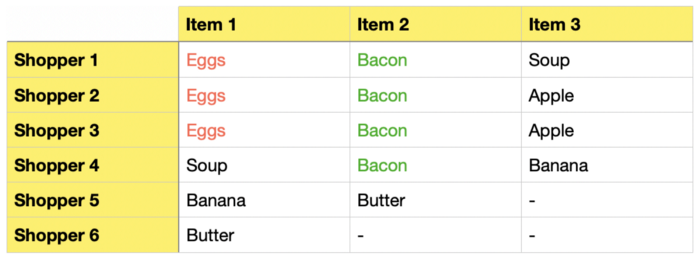

To measure the associations between thousands of data items, we will make use of the following metrics that are given below:
- Support
- Confidence
- Lift

### Support
Support is t how frequently an item appears in the dataset. It is defined as the fraction of the transaction T that contains the itemset X. If there are X datasets, then for transactions T, it can be written as:

$Support(X) = \frac {Freq(X,Y)}{T}$

In the example:


**Support(Eggs)** = 3/6 = 1/2 = 0.5 \
**Support(Bacon)** = 4/6 = 2/3 = 0.667 \
**Support(Apple)** = 2/6 = 1/3 = 0.333 \
**Support(Eggs&Bacon)** = 3/6 = 0.5

### Confidence
Confidence indicates the items X and Y occur together in the dataset.

$Confidence(X - Y) = \frac {Freq(X,Y)}{Freq(X)}$

Confidence is actually the same as what is also known as conditional probability in statistics:

$P(B|A) = \frac {P(A \cap B)}{P(A)}$

So, let’s calculate confidence for our example:

**Confidence(Eggs→Bacon**) = P(Eggs & Bacon) / Support(Eggs) = (3/6) / (3/6) = **1** \
**Confidence(Bacon→Eggs)** = P(Eggs & Bacon) / Support(Bacon) = (3/6) / (2/3) = 3/4 = **0.75** 

The above calculations tells us that whenever eggs are bought, bacon is also bought 100% of the time. Also, whenever bacon is bought, eggs are bought 75% of the time

### Lift
Lift is a way to evaluate objectively that how different items have stong association.

$Lift(X - Y) = \frac {Support(X,Y)}{Support(X) * Support(Y)}$

Liftt has three possible values:

- If **Lift= 1**: The probability of occurrence of antecedent and consequent is independent of each other.
- **Lift>1**: It determines the degree to which the two itemsets are dependent to each other.
- **Lift<1**: It tells us that one item is a substitute for other items, which means one item has a negative effect on another.


## The Dataset
The data we have consist of four features below: \
**UserId** : Customer number \
**ServiceId** : Services belongs to each category \
**CategoryId** : Categories(Cleaning, transportation, renovation category etc.) \
**CreateDate** : the purchase date 

We will follow below basic steps in order to implement associaion rule learning to out dataset:

1. Data Preprocessing
2. Preparing the ARL Data Structure (Invoice-Product Matrix)
3. Implementation of Association Rules
4. Recommending Products


# Data Preprocessing


In [13]:
import pandas as pd
import datetime as dt
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df = pd.read_csv("armut_data.csv")
df.head()

,UserId,ServiceId,CategoryId,CreateDate
0,25446,4,5,2017-08-06 16:11:00
1,22948,48,5,2017-08-06 16:12:00
2,10618,0,8,2017-08-06 16:13:00
3,7256,9,4,2017-08-06 16:14:00
4,25446,48,5,2017-08-06 16:16:00


ServiceID represents a different service for each CategoryID. By combining ServiceID and CategoryID we can create a new variable to represent these services


In [9]:
df["Service_Category"] = (df["ServiceId"].astype(str)) + "_" + (df["CategoryId"].astype(str))
df.head()

,UserId,ServiceId,CategoryId,CreateDate,Service_Category
0,25446,4,5,2017-08-06 16:11:00,4_5
1,22948,48,5,2017-08-06 16:12:00,48_5
2,10618,0,8,2017-08-06 16:13:00,0_8
3,7256,9,4,2017-08-06 16:14:00,9_4
4,25446,48,5,2017-08-06 16:16:00,48_5


The data set consists of the date and time the services are received, there is no basket definition (invoice, etc.). In order to apply Association Rule Learning, a basket (invoice, etc.) definition must be created. Here, the basket is the services each customer  monthly purchase of each customer purchased monthly. For example; A basket of 4_5, 48_5, 6_7, 47_7 services purchased by the customer with id 25446 in the 8th month of 2017 represent a basket; 17_5, 14_7 purchased in the 9th month of 2017 services represent another basket. Baskets must be identified with a unique ID. To do this, first create a new date variable containing only the year and month and thne combine UserID and the newly created date variable together then assign it to a new variable named BasketId.


In [17]:
df.CreateDate = pd.to_datetime(df.CreateDate)
df["New_Date"] = df.CreateDate.dt.to_period("M")
df["BasketId"] = df["UserId"].astype(str) + "_" + df["New_Date"].astype(str)
df.head()

,UserId,ServiceId,CategoryId,CreateDate,Service_Category,New_Date,BasketId
0,25446,4,5,2017-08-06 16:11:00,4_5,2017-08,25446_2017-08
1,22948,48,5,2017-08-06 16:12:00,48_5,2017-08,22948_2017-08
2,10618,0,8,2017-08-06 16:13:00,0_8,2017-08,10618_2017-08
3,7256,9,4,2017-08-06 16:14:00,9_4,2017-08,7256_2017-08
4,25446,48,5,2017-08-06 16:16:00,48_5,2017-08,25446_2017-08


In [56]:
df[df["Service_Category"] == "2_0"]

,UserId,ServiceId,CategoryId,CreateDate,Service_Category,New_Date,BasketId
102,21857,2,0,2017-08-07 00:53:00,2_0,2017-08,21857_2017-08
117,6981,2,0,2017-08-07 02:32:00,2_0,2017-08,6981_2017-08
137,6221,2,0,2017-08-07 04:16:00,2_0,2017-08,6221_2017-08
161,21608,2,0,2017-08-07 05:14:00,2_0,2017-08,21608_2017-08
177,23488,2,0,2017-08-07 05:53:00,2_0,2017-08,23488_2017-08
...,...,...,...,...,...,...,...
162469,18900,2,0,2018-08-06 04:30:00,2_0,2018-08,18900_2018-08
162484,11656,2,0,2018-08-06 07:17:00,2_0,2018-08,11656_2018-08
162497,12022,2,0,2018-08-06 08:47:00,2_0,2018-08,12022_2018-08
162502,11769,2,0,2018-08-06 09:30:00,2_0,2018-08,11769_2018-08


# Preparing the ARL Data Structure (Invoice-Product Matrix)

 - Create of Invoice X product matrix
 - Calculating the probabilities of product associations with the Apriori algorithm
 - Sorting each possible association of the products according to the support/lift values

In [58]:
def create_invoice_product_matrix(dataframe):
    return dataframe.groupby(by= ["BasketId", "Service_Category"]). \
            agg({"CategoryId": "count"}).unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0)

In [59]:
invoice_product_df = create_invoice_product_matrix(df)
invoice_product_df

CategoryId                                                 \
Service_Category        0_8 10_9 11_11 12_7 13_11 14_7 15_1 16_8 17_5 18_4   
BasketId                                                                     
0_2017-08                 0    0     0    0     0    0    0    0    0    0   
0_2017-09                 0    0     0    0     0    0    0    0    0    0   
0_2018-01                 0    0     0    0     0    0    0    0    0    0   
0_2018-04                 0    0     0    0     0    1    0    0    0    0   
10000_2017-08             0    0     0    0     0    0    0    0    0    0   
...                     ...  ...   ...  ...   ...  ...  ...  ...  ...  ...   
99_2017-12                1    0     0    0     0    0    0    0    0    0   
99_2018-01                1    0     0    0     0    0    0    0    0    0   
99_2018-02                1    0     0    0     0    0    0    0    0    0   
9_2018-03                 0    0     0    0     0    0    0    0    0    0   
9_2018-04                 0    0     0    0     0    0    0    0    0    0   

                  ...                                               
Service_Category  ... 46_4 47_7 48_5 49_1 4_5 5_11 6_7 7_3 8_5 9_4  
BasketId          ...                                               
0_2017-08         ...    1    0    1    0   0    0   0   0   0   0  
0_2017-09         ...    0    0    1    0   1    0   0   0   0   0  
0_2018-01         ...    0    0    0    0   0    0   0   1   0   0  
0_2018-04         ...    0    0    0    0   0    0   0   0   0   0  
10000_2017-08     ...    1    0    0    0   0    0   0   0   0   0  
...               ...  ...  ...  ...  ...  ..  ...  ..  ..  ..  ..  
99_2017-12        ...    0    0    0    0   0    0   0   0   0   0  
99_2018-01        ...    0    0    0    0   0    0   0   0   0   0  
99_2018-02        ...    0    0    0    0   0    0   0   0   0   0  
9_2018-03         ...    0    0    0    0   0    0   0   0   0   0  
9_2018-04         ...    0    0    0    0   0    0   0   0   0   0  

[71220 rows x 50 columns]

In [60]:
invoice_product_df.columns = invoice_product_df.columns.droplevel(0)
invoice_product_df.head()

Service_Category,0_8,10_9,11_11,12_7,13_11,14_7,15_1,16_8,17_5,18_4,...,46_4,47_7,48_5,49_1,4_5,5_11,6_7,7_3,8_5,9_4
BasketId,,,,,,,,,,,,,,,,,,,,,
0_2017-08,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
0_2017-09,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
0_2018-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
0_2018-04,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000_2017-08,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [61]:
invoice_product_df.head().style.background_gradient(axis=0, cmap='PuBu')

Service_Category,0_8,10_9,11_11,12_7,13_11,14_7,15_1,16_8,17_5,18_4,19_6,1_4,20_5,21_5,22_0,23_10,24_10,25_0,26_7,27_7,28_4,29_0,2_0,30_2,31_6,32_4,33_4,34_6,35_11,36_1,37_0,38_4,39_10,3_5,40_8,41_3,42_1,43_2,44_0,45_6,46_4,47_7,48_5,49_1,4_5,5_11,6_7,7_3,8_5,9_4
BasketId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0_2017-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
0_2017-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
0_2018-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
0_2018-04,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10000_2017-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [49]:
invoice_product_df.shape

(71220, 50)

# Implementation of Association Rules
Now let's look at the possibilities of all possible product combinations, we also have to set minimum support values or threshhold


In [64]:
frequent_itemsets = apriori(df= invoice_product_df, min_support= 0.01, use_colnames= True, low_memory= True)
frequent_itemsets

/home/etuncay/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.019728,(0_8)
1,0.026523,(11_11)
2,0.029374,(12_7)
3,0.056627,(13_11)
4,0.023406,(14_7)
5,0.120963,(15_1)
6,0.014659,(16_8)
7,0.041533,(17_5)
8,0.238121,(18_4)
9,0.045563,(19_6)


In [73]:
frequent_itemsets.head()

,support,itemsets
0,0.019728,(0_8)
1,0.026523,(11_11)
2,0.029374,(12_7)
3,0.056627,(13_11)
4,0.023406,(14_7)


In [66]:
frequent_itemsets.sort_values(by= "support", ascending= False).head(10)

,support,itemsets
8,0.238121,(18_4)
19,0.130286,(2_0)
5,0.120963,(15_1)
39,0.067762,(49_1)
28,0.066568,(38_4)
3,0.056627,(13_11)
12,0.047515,(22_0)
9,0.045563,(19_6)
15,0.042895,(25_0)
7,0.041533,(17_5)


Aboce we can see the possibilities of combinations of products. Now we have to create association rules by using frequent itemsets above

In [74]:
rules = association_rules(df= frequent_itemsets, metric= "support", min_threshold= 0.01)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2_0),(13_11),0.130286,0.056627,0.012819,0.098394,1.737574,0.005442,1.046325
1,(13_11),(2_0),0.056627,0.130286,0.012819,0.226382,1.737574,0.005442,1.124216
2,(2_0),(15_1),0.130286,0.120963,0.033951,0.260588,2.154278,0.018191,1.188833
3,(15_1),(2_0),0.120963,0.130286,0.033951,0.280673,2.154278,0.018191,1.209066
4,(15_1),(33_4),0.120963,0.027310,0.011233,0.092861,3.400299,0.007929,1.072262


# Recommending Products

In [68]:
def arl_recommender(rules_df, product_id, recommendation_number=1):
    recommendation_list = []
    sorted_rules = rules.sort_values("lift", ascending=False)
    for idx, product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):
            if j == product_id:
              recommendation_list.append(list(sorted_rules.iloc[idx]["consequents"])[0])
    return recommendation_list[:recommendation_number]

In [72]:
arl_recommender(rules, "2_0", 15)

['22_0', '25_0', '15_1', '13_11', '38_4']